In [2]:
import numpy as np
import matplotlib.pyplot as plt
# ---------- Data ----------
# Generate training samples
np.random.seed(42)
X = np.random.randn(100, 3)  # 100 samples, 3 inputs
true_w = np.array([2.0, 3.0, -1.0])
true_b = 1.0
y = X @ true_w.T + true_b  #0.1 * np.random.randn(100)  # add small noise



$$ y = 2x_1 +3x_2 - x_3 +1$$

In [3]:
y.shape, X.shape

((100,), (100, 3))

$$z = w_1x_1 + w_2x_2+w_3x_3+w_0$$

$$\mathcal{L} = \frac{1}{2N}\sum_{i=1}^{N}(y_i - \hat{y}_i)^2$$

$$\frac{\mathcal{dL}}{dw} = \frac{1}{N}\sum_{i=1}^{N}(\hat{y}_i -y_i  )x_i$$

In [4]:
# ---------- Initialize Parameters ----------
w = np.random.randn(3)   # weights
b = 0.0                  # bias
lr = 0.01                # learning rate
epochs = 200
L=[]
# ---------- Training Loop ----------
for epoch in range(epochs):
    # Forward pass
    z = X @ w + b
    y_pred = z
    # print(X.shape, w.shape, y_pred.shape)

    #calculcate Loss
    loss = np.mean(0.5 * (y - y_pred)**2)  # MSE
    L.append(loss)

    # Backward pass (gradients)
    grad_w = np.mean((y_pred - y).reshape(-1,1) * X, axis=0)
    # print(grad_w)
    grad_b = np.mean(y_pred - y)

    # Update
    w -= lr * grad_w
    b -= lr * grad_b

    if (epoch+1) % 20 == 0:
        print(f"Epoch {epoch+1}, Loss={loss:.4f}, w={w}, b={b:.4f}")

print("\nFinal learned weights:", w)
print("Final learned bias:", b)

print("\nActual weights:", true_w)
print("Actual bias:", true_b)


Epoch 20, Loss=7.9049, w=[-0.4559774   0.05913698  0.24291023], b=0.0977
Epoch 40, Loss=5.3222, w=[-0.13495302  0.56254351 -0.13101356], b=0.1965
Epoch 60, Loss=3.6369, w=[ 0.14186144  0.97333871 -0.4067093 ], b=0.2919
Epoch 80, Loss=2.5202, w=[ 0.38098607  1.30984495 -0.60861088], b=0.3813
Epoch 100, Loss=1.7689, w=[ 0.58789972  1.5865203  -0.75522276], b=0.4633
Epoch 120, Loss=1.2560, w=[ 0.76722026  1.81481496 -0.86054252], b=0.5372
Epoch 140, Loss=0.9009, w=[ 0.92285122  2.0038312  -0.93514376], b=0.6030
Epoch 160, Loss=0.6520, w=[ 1.05810171  2.16083291 -0.98700043], b=0.6611
Epoch 180, Loss=0.4755, w=[ 1.17578446  2.29163984 -1.02211414], b=0.7118
Epoch 200, Loss=0.3491, w=[ 1.27829657  2.40093348 -1.04499131], b=0.7559

Final learned weights: [ 1.27829657  2.40093348 -1.04499131]
Final learned bias: 0.7559019974532791

Actual weights: [ 2.  3. -1.]
Actual bias: 1.0


Text(0, 0.5, 'MSE Loss')

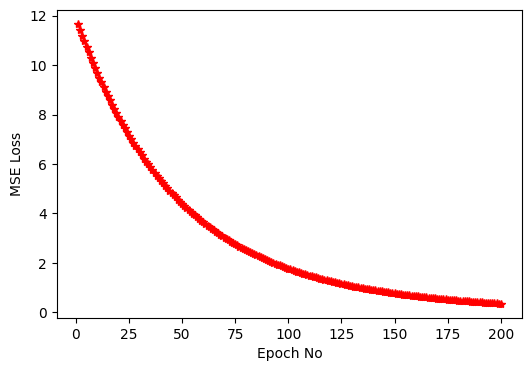

In [5]:
plt.figure(figsize=(6,4))
plt.plot(np.arange(1,epochs+1), L, '-r*')
plt.xlabel("Epoch No")
plt.ylabel("MSE Loss")

In [6]:
# ---------- Data ----------
np.random.seed(42)
X = np.random.randn(100, 3)  # 100 samples, 3 inputs
labels = (np.sum(X, axis=1) > 0).astype(int)  # class 1 if sum > 0

# ---------- Sigmoid ----------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ---------- Initialize Parameters ----------
w = np.random.randn(3)
b = 0.0
lr = 0.1
epochs = 200


In [7]:
L=[]
# ---------- Training Loop ----------
for epoch in range(epochs):
    # Forward pass
    z = X @ w + b
    y_pred = sigmoid(z)

    # Binary cross-entropy loss
    loss = -np.mean(labels * np.log(y_pred ) + (1 - labels) * np.log(1 - y_pred))
    L.append(loss)

    # Backward pass (gradients)
    grad_w = np.mean((y_pred - labels).reshape(-1,1) * X, axis=0)
    grad_b = np.mean(y_pred - labels)

    # Update
    w -= lr * grad_w
    b -= lr * grad_b

    if (epoch+1) % 20 == 0:
        preds = (y_pred >= 0.5).astype(int)
        acc = np.mean(preds == labels)
        print(f"Epoch {epoch+1}, Loss={loss:.4f}, Accuracy={acc:.2f}")

print("\nFinal learned weights:", w)
print("Final learned bias:", b)


Epoch 20, Loss=0.6913, Accuracy=0.63
Epoch 40, Loss=0.5238, Accuracy=0.77
Epoch 60, Loss=0.4319, Accuracy=0.89
Epoch 80, Loss=0.3765, Accuracy=0.96
Epoch 100, Loss=0.3394, Accuracy=0.98
Epoch 120, Loss=0.3124, Accuracy=0.97
Epoch 140, Loss=0.2915, Accuracy=0.97
Epoch 160, Loss=0.2747, Accuracy=0.98
Epoch 180, Loss=0.2608, Accuracy=0.98
Epoch 200, Loss=0.2491, Accuracy=0.98

Final learned weights: [1.45227406 1.61412147 1.44484472]
Final learned bias: -0.0451677454658761


Text(0, 0.5, 'Log Loss')

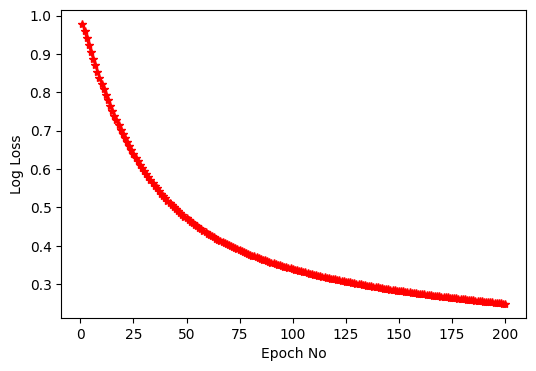

In [8]:
plt.figure(figsize=(6,4))
plt.plot(np.arange(1,epochs+1), L, '-r*')
plt.xlabel("Epoch No")
plt.ylabel("Log Loss")

In [9]:

# ---------- Data ----------
np.random.seed(42)
X = np.random.randn(100, 3)   # 100 samples, 3 features
true_w = np.array([2.0, 3.0, -1.0])
true_b = 1.0
y = X @ true_w + true_b

# ---------- Network Architecture ----------
input_dim = 3
hidden_dim = 2
output_dim = 1

lr = 0.05
epochs = 300

# Activation function (ReLU)
def relu(z):
    return np.maximum(0, z)

def relu_grad(z):
    return (z > 0).astype(float)



In [10]:
# Initialize weights
W1 = np.random.randn(input_dim, hidden_dim)  # (3x2)
b1 = np.zeros(hidden_dim)                    # (2,)
W2 = np.random.randn(hidden_dim, output_dim) # (2x1)
b2 = np.zeros(output_dim)                    # (1,)
L=[]
# ---------- Training ----------
for epoch in range(epochs):
    # Forward pass
    z1 = X @ W1 + b1   # (100x2)
    h1 = relu(z1)      # hidden activation
    z2 = h1 @ W2 + b2  # (100x1)
    y_pred = z2

    # Loss (MSE)
    loss = np.mean(0.5 * (y - y_pred.flatten())**2)
    L.append(loss)

    # Backward pass
    dL_dy = (y_pred.flatten() - y) / X.shape[0]  # (100,)

    dW2 = h1.T @ dL_dy.reshape(-1,1)
    # print(h1.T.shape, dL_dy.reshape(-1,1).shape)
    db2 = np.sum(dL_dy)

    dh1 = dL_dy.reshape(-1,1) @ W2.T  # dz2/dh1
    dz1 = dh1 * relu_grad(z1)         # dh1/dz1

    dW1 = X.T @ dz1                   #dz1/dw1
    db1 = np.sum(dz1, axis=0)

    # Update
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}, Loss={loss:.4f}")

print("\nFinal Loss:", loss)


Epoch 50, Loss=0.2778
Epoch 100, Loss=0.1102
Epoch 150, Loss=0.1017
Epoch 200, Loss=0.0990
Epoch 250, Loss=0.0967
Epoch 300, Loss=0.0931

Final Loss: 0.09309610477079923


Text(0, 0.5, 'MSE Loss')

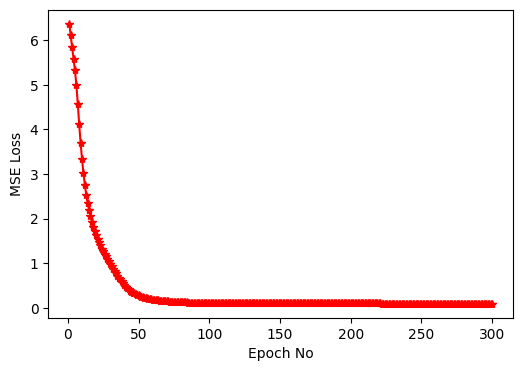

In [11]:
plt.figure(figsize=(6,4))
plt.plot(np.arange(1,epochs+1), L, '-r*')
plt.xlabel("Epoch No")
plt.ylabel("MSE Loss")

In [12]:
# ---------- Data ----------
# np.random.seed(42)
# X = np.random.randn(200, 3)
# labels = (np.sum(X, axis=1) > 0).astype(int)

from sklearn.datasets import load_iris
data = load_iris()
X, labels =data.data[50:150, 1:4], data.target[50:150]
labels = (labels==1).astype(int)
# print(labels)
# ---------- Network Architecture ----------
input_dim = 3
hidden_dim = 2
output_dim = 1

lr = 0.1
epochs = 500

# Activation functions
def relu(z):
    return np.maximum(0, z)

def relu_grad(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))



In [13]:

W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros(hidden_dim)
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros(output_dim)
L=[]
# ---------- Training ----------
for epoch in range(epochs):
    # Forward pass
    z1 = X @ W1 + b1
    h1 = relu(z1)
    z2 = h1 @ W2 + b2
    y_pred = sigmoid(z2).flatten()

    # Binary cross-entropy loss
    loss = -np.mean(labels*np.log(y_pred) + (1-labels)*np.log(1-y_pred))
    L.append(loss)

    # Backward pass
    dL_dz2 = (y_pred - labels) / X.shape[0]   # (200,)
    dW2 = h1.T @ dL_dz2.reshape(-1,1)
    db2 = np.sum(dL_dz2)

    dh1 = dL_dz2.reshape(-1,1) @ W2.T
    dz1 = dh1 * relu_grad(z1)

    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0)

    # Update
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if (epoch+1) % 50 == 0:
        preds = (y_pred >= 0.5).astype(int)
        acc = np.mean(preds == labels)
        print(f"Epoch {epoch+1}, Loss={loss:.4f}, Acc={acc:.2f}")

print("\nFinal Accuracy:", np.mean((y_pred >= 0.5).astype(int) == labels))


Epoch 50, Loss=0.6500, Acc=0.52
Epoch 100, Loss=0.6137, Acc=0.57
Epoch 150, Loss=0.4460, Acc=0.89
Epoch 200, Loss=0.3859, Acc=0.84
Epoch 250, Loss=0.3157, Acc=0.90
Epoch 300, Loss=0.2523, Acc=0.92
Epoch 350, Loss=0.2055, Acc=0.95
Epoch 400, Loss=0.1796, Acc=0.95
Epoch 450, Loss=0.1645, Acc=0.95
Epoch 500, Loss=0.1555, Acc=0.95

Final Accuracy: 0.95


Text(0, 0.5, 'Log Loss')

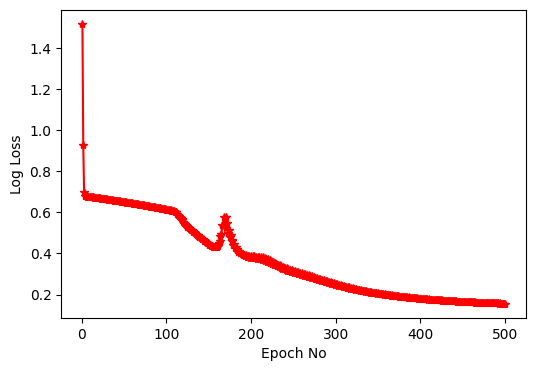

In [14]:
plt.figure(figsize=(6,4))
plt.plot(np.arange(1,epochs+1), L, '-r*')
plt.xlabel("Epoch No")
plt.ylabel("Log Loss")

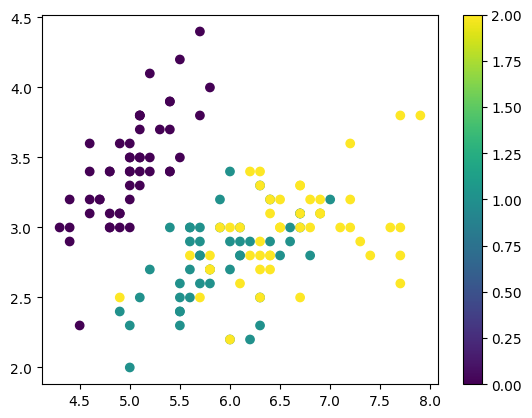

In [15]:
plt.scatter(data.data[:,0], data.data[:,1], c=data.target)
plt.colorbar()

In [16]:
data.data.shape, data.target

((150, 4),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))